In [ ]:
!pip install statsmodels
!pip install scikit-image

     |████████████████████████████████| 9.8 MB 22.1 MB/s 
     |████████████████████████████████| 233 kB 45.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 13.5 MB 13.4 MB/s 
     |████████████████████████████████| 178 kB 41.8 MB/s 
     |████████████████████████████████| 3.3 MB 13.6 MB/s 
     |████████████████████████████████| 6.4 MB 40.5 MB/s 
     |████████████████████████████████| 1.9 MB 45.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import Config
import skimage.io as sk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.robust import mad
from PIL import Image 

# Constructing color features for machine learning

#### Making a dataframe from features.csv to get the files id's

In [ ]:
img_features_df = pd.read_csv(Config.features_path)
#img_features_df = img_features_df.drop(['area', 'perimeter'], axis=1) #we only need the id
mel_df = pd.read_csv(Config.example_ground_truth_path)

img_features_df['melanoma'] = mel_df['melanoma']

#print(img_features_df[img_features_df['melanoma'] == 1]) #getting the images that show cancer lesions

## Color class

In [ ]:
class Color:
    def __init__(self, img, img_bw):
        self.img = img
        self.img_bw = img_bw
    

    def score_variability(self):
        '''
            Assigns a variability score
        '''
        if self._check_variability() < 20: 
            return 0 
        elif self._check_variability() < 50: 
            return 1
        else: 
            return 2

    def _check_variability(self):
        '''
            Returns a mean of the median absolute deviation of each color (rgb)
        '''
        self.img[self.img_bw==0] = 0
        
        #we then calculate the mad of each dimension 
        r, g, b = self.img[:,:,0], self.img[:,:,1], self.img[:,:,2]
        mad_r= mad(r[np.where(r != 0)])
        mad_g= mad(g[np.where(g != 0)])
        mad_b= mad(b[np.where(b != 0)])
        mad_result= [mad_r,mad_g,mad_b]

        #calculating the mean
        return np.mean(mad_result)

### Looping through each image and checking its color

In [ ]:
#M,N is the range of images that we choosen (finally it will be 0-# of images)
N = 0
M = 150

mad_lst = [0 for _ in range(M-N)]


#the main for loop which loads the images
for (index, id) in enumerate(img_features_df['id'][N:M]):
    img = plt.imread(f'../data/example_image/{id}.jpg') #main image
    img_bw = plt.imread(f'../data/example_segmentation/{id}_segmentation.png') #main image grayed

    title = f"{id}: {img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]}"
    is_cancer = img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]

    #creating an instance of the Color class & applying its functions
    color = Color(img, img_bw)
    mad_lst[index] = (id, color.score_variability(), is_cancer)

### Measuring accuracy (just for us)

In [ ]:

mad_data = pd.DataFrame(mad_lst, columns=['id', 'mad','melanoma'])

true_mask = (mad_data['melanoma'] == 1) & (mad_data['mad'] == 1)
true_mask2 = (mad_data['melanoma'] == 1) & (mad_data['mad'] == 2)

false_mask = (mad_data['melanoma'] == 0) & (mad_data['mad'] == 0)

guessed = len(mad_data[true_mask]) + len(mad_data[true_mask2]) + len(mad_data[false_mask])

print(f'accuracy of variability {guessed / (M-N)}')

accuracy of variability 0.46


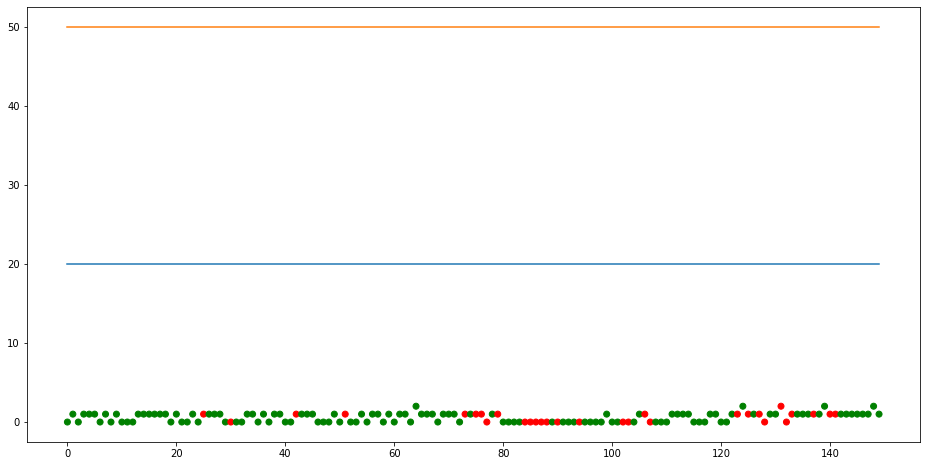

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

colors = ["green" if img_features_df['melanoma'][x] == 0.0 else 'red' for x in range(len(img_features_df['melanoma'])) ]
x_axis = [i for i in range(M-N)]
ax.scatter(x_axis, mad_data['mad'], c=colors);
ax.plot(x_axis, [20 for _ in range(M-N)])
ax.plot(x_axis, [50 for _ in range(M-N)])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>